### Предобработка данных

#### 1. В переменной df находится датафрэйм. Запишите в переменную  df_shape строку с информацией о том, сколько строк и столбцов он содержит, в следующем виде:

'df has y rows and x columns'

где y — число строк, а x — число колонок.

In [126]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

Создадим df

In [127]:
df= pd.DataFrame ({'client_id': [None, 3998.0, None, None, 5736.0], 'sex': [None, 1.0, None, None, 0.0], 'wealth': [None, 'high', None, None, 'high'], 'age': [58, 55, 46, 23, 44]})

В новую переменную запишем необходимый текст и оставим место для значений

In [128]:
df_shape = "df has {} rows and {} columns"

С помощью функции format добавим в df_shape информацию о количестве строк и колонок

In [129]:
df_shape.format(df.shape[0], df.shape[1])

'df has 5 rows and 4 columns'

#### 2. Сохраните в переменную na_number серию, в которой для каждой колонки будет указано, сколько пропущенных значений она содержит

Воспользуемся методом isna, он вернёт df

В строках где значение пропущено он укажет 'True'

Где значение не пропущено 'False'

C помощью метода 'sum' посчитаем пропущенные значения, запишем всё в переменную na_number

In [130]:
na_number= df.isna().sum()

In [131]:
na_number

client_id    3
sex          3
wealth       3
age          0
dtype: int64

#### 3. Сохраните в переменную df_types типы данных каждой колонки датафрэйма df.

In [132]:
df_types = df.dtypes

In [133]:
df_types

client_id    float64
sex          float64
wealth        object
age            int64
dtype: object

#### 4. Внезапно оказалось, что в колонке age значения хранятся в виде строк! Поменяйте тип значений на целочисленный в этой колонке датафрэйма df.

Воспользуемся методом astype

In [134]:
df = df.astype({'age': 'int64'})

#### 5. Как выяснилось, для дальнейшего анализа нам не понадобятся колонки sex и age – удалите их из датафрэйма.

Для удаления воспользуемся методом drop

В параметре columns укажем список с колонками

In [135]:
df =df.drop(columns = ['sex', 'age'])

#### 6. А теперь проверим, есть ли в нашей таблице df дубликаты по полю client_id. Сохраните в переменную df датафрейм, в котором не будет дубликатов по колонке client_id, оставив первую строку с id

Воспользуемся методом drop_dublicates, в параметр subset необходимо поместить колонку по которой будут удаляться дубликаты

In [136]:
df =df.drop_duplicates (subset='client_id')

#### 7. А сейчас ненадолго вернемся к чистому Python.
#### В списке numbers содержатся числа. Добавьте через цикл в список positive_numbers положительные числа из numbers. Если вам попался 0, то нужно прекратить этот цикл.

Например,

numbers = [1, -2, 3, 0, -3, 2]

Тогда positive_numbers должен быть:

positive_numbers = [1, 3]


Создадим переменную numbers

In [137]:
numbers = [1, -2, 3, 0, -3, 2]

Создадим пустой список positive_numbers

In [138]:
positive_numbers= []

Напишем цикл, который будет добавлять в переменную positive_numbers значения больше нуля

И который будет прерываться, если какое-либо значение равно нулю

In [139]:
for number in numbers:
    if number == 0:
        break
    elif number > 0:
        positive_numbers.append(number)    

In [140]:
positive_numbers

[1, 3]

#### 8. Продолжим анализ данных по поездкам на такси из Перу. В предыдущем уроке вы изучили распределения оценок водителей и клиентов. Теперь посмотрим на колонки со временем!

#### Ссылка на датасет находится в переменной path_to_file. Сохраните данные в переменную taxi, разделитель — ;.

#### Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type) .

Запишем путь в переменную

In [141]:
path_to_file = 'https://raw.githubusercontent.com/Vlkoz/data_preparation/main/files/3_taxi_peru.csv'

In [142]:
taxi = pd.read_csv(path_to_file, sep = ';')

In [143]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


Переведем нужные нам колонки в формат даты

In [144]:
taxi['start_at'] =pd.to_datetime(taxi['start_at'])
taxi['end_at'] =pd.to_datetime(taxi['end_at'])
taxi['arrived_at'] =pd.to_datetime(taxi['arrived_at'])

Отфильтруем строки

In [145]:
taxi =taxi.query("start_type == 'asap' or start_type == 'reserved'")

#### 9. ⭐️Задание со звёздочкой!⭐️

#### Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах.

Создадим колонку с разницей  временем подачи машины (arrived_at) и временем заказа (start_at) в минутах

In [146]:
taxi['wait_time'] = taxi.arrived_at - taxi.start_at

Поменяем тип колонки на таймдельта

In [147]:
taxi.wait_time =taxi.wait_time.astype('timedelta64[m]')

In [148]:
taxi.wait_time

0        18.0
1         NaN
2         NaN
3         NaN
4        -5.0
         ... 
23106     0.0
23107    13.0
23108     9.0
23109    -7.0
23110     NaN
Name: wait_time, Length: 23091, dtype: float64

#### 10. ⭐️Задание со звёздочкой!⭐️

#### Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.
#### Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз

In [149]:
taxi.query("start_type == 'reserved' and wait_time > 0.0") \
    .groupby('driver_id', as_index = False) \
    .agg({'user_id': 'count'}) \
    .sort_values('user_id', ascending = False)

,driver_id,user_id
24,406921adcca37705ef527b4246c0cfea,67
86,d665fb9f75ef5d9cd0fd89479380ba78,59
93,ec84a73745199ff840ecafcb924383ad,57
29,56f59b58bcbbd1cdabc3652e713134c2,51
77,c814db2127582cf95dea1f74f43127c2,45
...,...,...
88,d7bf644eb441cda6127f91addebb85c4,1
71,b68895736389f2949faa8c73555b81ac,1
51,8cb98e46b27af1e6fca8768a2a6329f3,1
16,389bfa333ba8fa7281dd5f0e1b57c0c1,1


#### 11. Подумайте, что может влиять на число опозданий из прошлого задания 🤔

На число опозданий может влиять пунктуальность водителя и число взятых заказов

#### 12. ⭐️Задание со звёздочкой!⭐️

#### Добавьте столбец month, где будет храниться номер месяца, в котором был сделан заказ (start_at),  и столбец weekday – название дня недели. 

Запишем в колонку month месяц, извлеченный из колонки start_at с помощью метода dt.strftime

Переведем тип колонки в формат целого числа

In [150]:
taxi['month'] = taxi.start_at.dt.strftime('%m').astype('int')

In [151]:
taxi.month

0        11
1         6
2         5
3         6
4         9
         ..
23106     7
23107    10
23108     9
23109     4
23110     3
Name: month, Length: 23091, dtype: int32

Запишем в колонку weekday месяц, извлеченный из колонки start_at с помощью метода dt.strftime

In [152]:
taxi['weekday'] = taxi.start_at.dt.strftime('%A')

In [153]:
taxi.weekday

0         Tuesday
1         Tuesday
2          Monday
3         Tuesday
4        Saturday
           ...   
23106    Saturday
23107    Saturday
23108     Tuesday
23109    Thursday
23110     Tuesday
Name: weekday, Length: 23091, dtype: object

#### 13.⭐️Задание со звёздочкой!⭐️

#### Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина. 

#### Вопрос: в каком летнем месяце было сделано наименьшее число заказов? В качестве ответа введите номер месяца (6, 7 или 8). 


Сгруппируем данные по количеству заказов по месяцам

In [154]:
monthly_orders = taxi.groupby('month', as_index = False) \
    .agg({'end_state' : 'count'}) \
    .sort_values('end_state') \
    .rename(columns = {'end_state': 'orders'}) \
    .reset_index (drop = True)    

Построим график, показывающий количество заказов по месяцам

Меньше всего заказов было сделано в июле

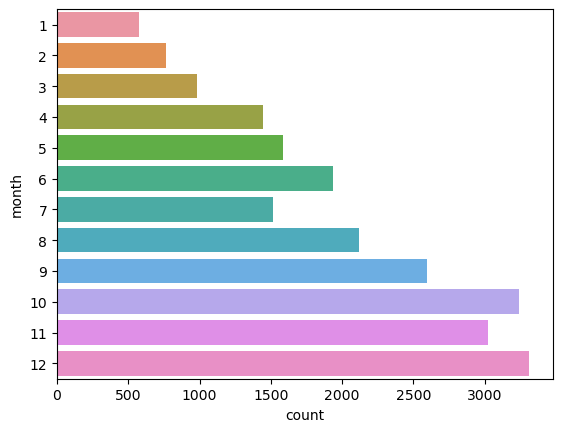

In [155]:
ax =sns.countplot (y = 'month',  data = taxi)

#### 14.⭐️Задание со звёздочкой!⭐️

#### А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке. Например: 

sns.countplot(data['column'], order=['One', 'Two', 'Three'])

#### Вопрос: в какой день недели суммарно поступает меньше всего заказов? Укажите то название, которое написано в самом датафрейме.

Используем countplot для построения графика

Зададим значения по порядку

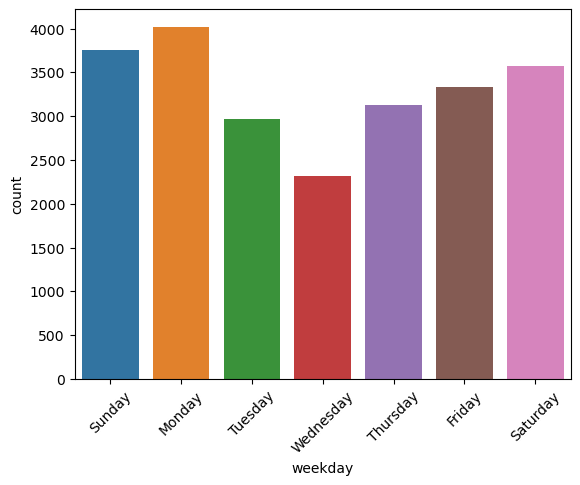

In [156]:
ax = sns.countplot(taxi['weekday'], order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
# Для удобства развернем на 45 градусов название дней недели
ax.tick_params (axis= 'x', rotation = 45)
warnings.filterwarnings('ignore')

Меньше всего заказов поступает в среду (Wednesday)

#### 15. ⭐️Задание со звёздочкой!⭐️

#### Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:

* DAU (daily active users) – число уникальных пользователей за день
* WAU (weekly active users) – число уникальных пользователей за неделю
* MAU (monthly active users) – число уникальных пользователей за месяц
* Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени. 

#### Постройте график MAU и выберите верные утверждения. 

Рассчитаем MAU (monthly active users)

In [157]:
MAU = taxi.groupby('month', as_index= False) \
    .agg({'user_id': 'nunique'})

Построим lineplot, который покажет нам как менялось количество уникальных пользователей с течением месяцев

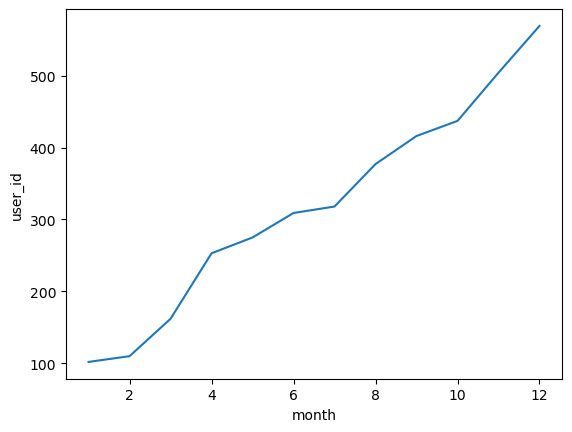

In [158]:
lines = sns.lineplot(MAU.month, MAU.user_id)
warnings.filterwarnings('ignore')

Таким образом, MAU за апрель примерно в 2.5 раза больше, чем за январь

В течение всего года число уникальных пользователей увеличивалось

In [159]:
MAU

,month,user_id
0,1,102
1,2,110
2,3,162
3,4,253
4,5,275
5,6,309
6,7,318
7,8,377
8,9,416
9,10,437
